In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
train = pd.read_parquet("../datasets//train.parquet")

In [4]:
train.head()

,counter_id,counter_name,site_id,site_name,bike_count,date,counter_installation_date,coordinates,counter_technical_id,latitude,longitude,log_bike_count
48321,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,0.0,2020-09-01 02:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,2.375429,0.000000
48324,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,1.0,2020-09-01 03:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,2.375429,0.693147
48327,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,0.0,2020-09-01 04:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,2.375429,0.000000
48330,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,4.0,2020-09-01 15:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,2.375429,1.609438
48333,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,9.0,2020-09-01 18:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,2.375429,2.302585


In [218]:
train.isna().any()

counter_id                   False
counter_name                 False
site_id                      False
site_name                    False
bike_count                   False
date                         False
counter_installation_date    False
coordinates                  False
counter_technical_id         False
latitude                     False
longitude                    False
log_bike_count               False
dtype: bool

In [220]:
train.shape

(496827, 12)

In [222]:
train.columns

Index(['counter_id', 'counter_name', 'site_id', 'site_name', 'bike_count',
       'date', 'counter_installation_date', 'coordinates',
       'counter_technical_id', 'latitude', 'longitude', 'log_bike_count'],
      dtype='object')

In [224]:
train["site_name"].value_counts()

site_name
Face au 40 quai D'Issy                       17948
Face 104 rue d'Aubervilliers                 17948
Totem 73 boulevard de Sébastopol             17948
Pont de Bercy                                17948
Pont Charles De Gaulle                       17948
Face au 8 avenue de la porte de Charenton    17948
Face au 70 quai de Bercy                     17948
Face au 48 quai de la marne                  17948
18 quai de l'Hôtel de Ville                  17948
Face au 4 avenue de la porte de Bagnolet     17948
Face au 25 quai de l'Oise                    17948
90 Rue De Sèvres                             17948
Quai d'Orsay                                 17948
Totem 85 quai d'Austerlitz                   17948
6 rue Julia Bartet                           17948
39 quai François Mauriac                     17948
38 rue Turbigo                               17948
36 quai de Grenelle                          17948
28 boulevard Diderot                         17948
27 quai de la Tournel

In [226]:
train.describe()

,site_id,bike_count,date,counter_installation_date,latitude,longitude,log_bike_count
count,4.968270e+05,496827.000000,496827,496827,496827.000000,496827.000000,496827.000000
mean,1.053450e+08,60.191475,2021-03-08 07:25:59.668858,2019-04-04 07:24:35.245911,48.854343,2.345479,3.079917
min,1.000070e+08,0.000000,2020-09-01 01:00:00,2013-01-18 00:00:00,48.826360,2.265420,0.000000
25%,1.000475e+08,5.000000,2020-12-05 22:00:00,2018-11-29 00:00:00,48.840801,2.314440,1.791759
50%,1.000562e+08,29.000000,2021-03-08 11:00:00,2019-11-06 00:00:00,48.852090,2.353870,3.401197
75%,1.000563e+08,79.000000,2021-06-09 14:00:00,2019-12-11 00:00:00,48.864610,2.375870,4.382027
max,3.000147e+08,1302.000000,2021-09-09 23:00:00,2020-11-29 00:00:00,48.891720,2.409690,7.172425
std,3.210346e+07,87.590566,NaN,NaN,0.018554,0.038026,1.659899


In [228]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 496827 entries, 48321 to 929187
Data columns (total 12 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   counter_id                 496827 non-null  category      
 1   counter_name               496827 non-null  category      
 2   site_id                    496827 non-null  int64         
 3   site_name                  496827 non-null  category      
 4   bike_count                 496827 non-null  float64       
 5   date                       496827 non-null  datetime64[us]
 6   counter_installation_date  496827 non-null  datetime64[us]
 7   coordinates                496827 non-null  category      
 8   counter_technical_id       496827 non-null  category      
 9   latitude                   496827 non-null  float64       
 10  longitude                  496827 non-null  float64       
 11  log_bike_count             496827 non-null  float64  

In [230]:
vacances_paris_2020 = [
    ("2020-10-17", "2020-11-01"),  
    ("2020-12-19", "2021-01-03"),  
    ("2021-02-13", "2021-02-28"),  
    ("2021-04-17", "2021-05-02"), 
    ("2021-07-06", "2021-08-31"), 
]

vacances_paris_2020 = [(pd.to_datetime(debut), pd.to_datetime(fin)) for debut, fin in vacances_paris_2020]

In [232]:
def est_vacances(date, vacances):
    for debut, fin in vacances:
        if debut <= date <= fin:
            return 1  
    return 0  

train["vacances_scolaires"] = train["date"].apply(lambda x: est_vacances(x, vacances_paris_2020))

In [233]:
jours_feries = [
    "2020-11-01",  
    "2020-11-11", 
    "2020-12-25",  
    "2021-01-01",  
    "2021-04-05",  
    "2021-05-01",  
    "2021-05-08",  
    "2021-05-13", 
    "2021-05-24",  
    "2021-07-14",  
    "2021-08-15", 
]
jours_feries = pd.to_datetime(jours_feries)

In [236]:
train["jour_ferie"] = train["date"].apply(lambda x: 1 if x in jours_feries else 0)

In [237]:
confinements = [
    ("2020-10-30", "2020-12-15", "confinement"),
    ("2021-03-20", "2021-04-17", "confinement"), 
]

couvre_feux = [
    ("2020-10-17", "2020-12-14", "21:00", "06:00", "couvre-feu"),
    ("2020-12-15", "2021-01-15", "20:00", "06:00", "couvre-feu"),
    ("2021-01-16", "2021-03-19", "18:00", "06:00", "couvre-feu"),
    ("2021-03-20", "2021-06-08", "19:00", "06:00", "couvre-feu"),
    ("2021-06-09", "2021-06-19", "23:00", "06:00", "couvre-feu"),
]

confinements = [(pd.to_datetime(start), pd.to_datetime(end), label) for start, end, label in confinements]
couvre_feux = [(pd.to_datetime(start), pd.to_datetime(end), start_hour, end_hour, label) for start, end, start_hour, end_hour, label in couvre_feux]

In [238]:
train["confinement"] = 0
train["couvre_feu"] = 0
train["couvre_feu_horaires"] = None

for start, end, label in confinements:
    train.loc[(train["date"] >= start) & (train["date"] <= end), "confinement"] = 1

for start, end, start_hour, end_hour, label in couvre_feux:

    in_couvre_feu_period = (train["date"] >= start) & (train["date"] <= end)

    in_couvre_feu_hours = (train["date"].dt.time >= pd.to_datetime(start_hour).time()) | (train["date"].dt.time <= pd.to_datetime(end_hour).time())

    train.loc[in_couvre_feu_period & in_couvre_feu_hours, "couvre_feu"] = 1
    train.loc[in_couvre_feu_period & in_couvre_feu_hours, "couvre_feu_horaires"] = f"{start_hour}-{end_hour}"

In [239]:
train

,counter_id,counter_name,site_id,site_name,bike_count,date,counter_installation_date,coordinates,counter_technical_id,latitude,longitude,log_bike_count,vacances_scolaires,jour_ferie,confinement,couvre_feu,couvre_feu_horaires
48321,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,0.0,2020-09-01 02:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,2.375429,0.000000,0,0,0,0,None
48324,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,1.0,2020-09-01 03:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,2.375429,0.693147,0,0,0,0,None
48327,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,0.0,2020-09-01 04:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,2.375429,0.000000,0,0,0,0,None
48330,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,4.0,2020-09-01 15:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,2.375429,1.609438,0,0,0,0,None
48333,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,9.0,2020-09-01 18:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,2.375429,2.302585,0,0,0,0,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
929175,300014702-353245971,254 rue de Vaugirard SO-NE,300014702,254 rue de Vaugirard,445.0,2021-09-09 06:00:00,2020-11-29,"48.83977,2.30198",Y2H20114504,48.839770,2.301980,6.100319,0,0,0,0,None
929178,300014702-353245971,254 rue de Vaugirard SO-NE,300014702,254 rue de Vaugirard,145.0,2021-09-09 10:00:00,2020-11-29,"48.83977,2.30198",Y2H20114504,48.839770,2.301980,4.983607,0,0,0,0,None
929181,300014702-353245971,254 rue de Vaugirard SO-NE,300014702,254 rue de Vaugirard,218.0,2021-09-09 15:00:00,2020-11-29,"48.83977,2.30198",Y2H20114504,48.839770,2.301980,5.389072,0,0,0,0,None
929184,300014702-353245971,254 rue de Vaugirard SO-NE,300014702,254 rue de Vaugirard,21.0,2021-09-09 22:00:00,2020-11-29,"48.83977,2.30198",Y2H20114504,48.839770,2.301980,3.091042,0,0,0,0,None


In [242]:
del train["couvre_feu_horaires"]

In [246]:
train['day'] = train['date'].dt.date
daily_counts = train.groupby(['site_name', 'day'])['bike_count'].sum().reset_index()

/var/folders/tv/xjldkmgs0n1bjwmmm79pqvs00000gn/T/ipykernel_70367/1573975223.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  daily_counts = train.groupby(['site_name', 'day'])['bike_count'].sum().reset_index()


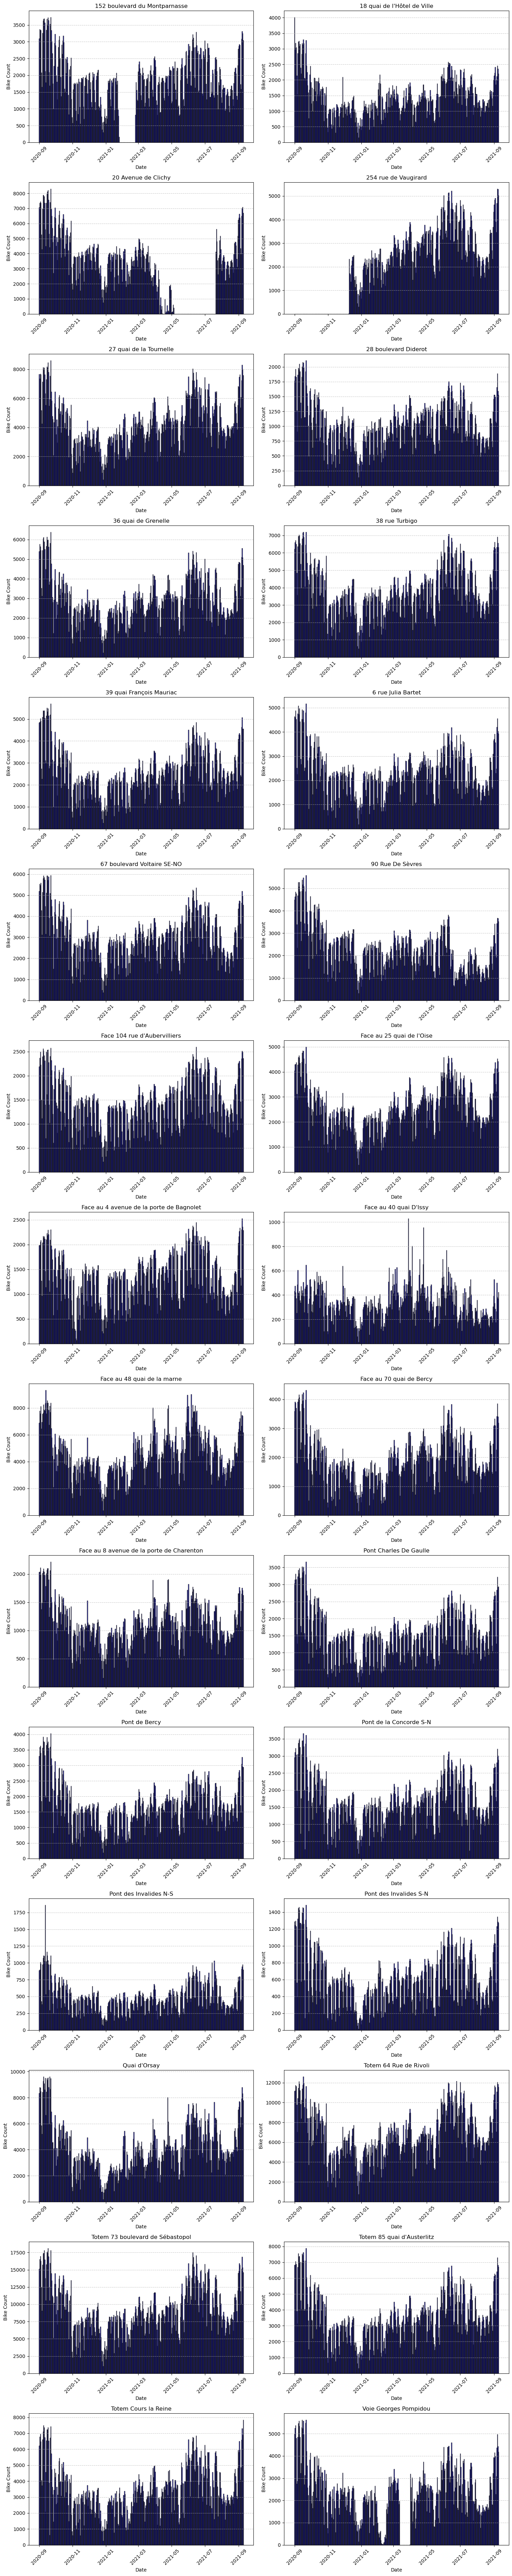

In [248]:
site_names = daily_counts['site_name'].unique()
import math

# Déterminer le nombre de subplots requis
n_sites = len(site_names)
n_cols = 2  # Nombre de colonnes (2 par ligne)
n_rows = math.ceil(n_sites / n_cols)  # Nombre de lignes nécessaires

# Créer une figure avec des subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))  # Ajustez figsize pour plus de lisibilité
axes = axes.flatten()  # Aplatir les axes pour les parcourir facilement

# Créer les histogrammes pour chaque site
for i, site in enumerate(site_names):
    site_data = daily_counts[daily_counts['site_name'] == site]
    axes[i].bar(site_data['day'], site_data['bike_count'], color='blue', alpha=0.7, edgecolor='black')
    axes[i].set_title(f"{site}")
    axes[i].set_xlabel("Date")
    axes[i].set_ylabel("Bike Count")
    axes[i].tick_params(axis='x', rotation=45)  # Rotation des labels des dates
    axes[i].grid(axis="y", linestyle="--", alpha=0.7)

# Supprimer les subplots inutilisés s'il y en a
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Ajuster les espaces entre les subplots
plt.tight_layout()
plt.show()

In [249]:
meteo = pd.read_csv('/Users/leatinelli/Desktop/X-HEC/msdb-2024/external_data.csv')

In [250]:
meteo.isnull().any()

numer_sta    False
date         False
pmer         False
tend         False
cod_tend     False
dd           False
ff           False
t            False
td           False
u            False
vv           False
ww           False
w1            True
w2            True
n             True
nbas          True
hbas          True
cl            True
cm            True
ch            True
pres         False
niv_bar       True
geop          True
tend24        True
tn12          True
tn24          True
tx12          True
tx24          True
tminsol       True
sw            True
tw            True
raf10         True
rafper       False
per          False
etat_sol      True
ht_neige      True
ssfrai        True
perssfrai     True
rr1           True
rr3           True
rr6           True
rr12          True
rr24          True
phenspe1      True
phenspe2      True
phenspe3      True
phenspe4      True
nnuage1       True
ctype1        True
hnuage1       True
nnuage2       True
ctype2        True
hnuage2     

In [251]:
meteo.describe()

,numer_sta,pmer,tend,cod_tend,dd,ff,t,td,u,vv,...,hnuage1,nnuage2,ctype2,hnuage2,nnuage3,ctype3,hnuage3,nnuage4,ctype4,hnuage4
count,3322.0,3322.000000,3322.000000,3322.000000,3322.000000,3322.000000,3322.000000,3322.000000,3322.000000,3322.000000,...,2867.000000,1695.000000,1443.000000,1695.000000,618.000000,470.000000,618.000000,42.000000,87.000000,42.000000
mean,7149.0,101682.886815,-0.237809,4.273028,184.379892,3.654154,285.877905,281.006442,74.775135,20142.338952,...,2028.674573,5.030678,4.515593,2692.943953,5.441748,3.961702,3310.695793,3.476190,6.735632,3205.000000
std,0.0,923.888170,122.191314,2.713199,103.708084,2.000353,6.851700,5.634409,17.022427,10283.556918,...,2377.241533,2.003304,2.463098,2309.340104,2.017108,3.042454,2423.703985,2.360633,3.196873,2595.553656
min,7149.0,97260.000000,-750.000000,0.000000,0.000000,0.000000,267.650000,260.750000,24.000000,120.000000,...,0.000000,1.000000,0.000000,60.000000,1.000000,0.000000,300.000000,1.000000,0.000000,360.000000
25%,7149.0,101200.000000,-70.000000,2.000000,80.000000,2.200000,280.950000,276.950000,63.000000,12710.000000,...,500.000000,3.000000,3.000000,1080.000000,4.250000,0.000000,1400.000000,1.000000,6.000000,1112.500000
50%,7149.0,101820.000000,0.000000,3.000000,200.000000,3.400000,285.850000,281.450000,79.000000,20000.000000,...,1080.000000,5.000000,6.000000,1800.000000,6.000000,3.000000,2430.000000,2.500000,8.000000,2150.000000
75%,7149.0,102287.500000,70.000000,7.000000,260.000000,4.900000,290.650000,285.550000,89.000000,25000.000000,...,2100.000000,7.000000,6.000000,3400.000000,7.000000,6.000000,5000.000000,5.750000,9.000000,5800.000000
max,7149.0,103920.000000,720.000000,8.000000,360.000000,14.600000,307.450000,293.150000,100.000000,60000.000000,...,9000.000000,8.000000,9.000000,9000.000000,8.000000,9.000000,9000.000000,7.000000,9.000000,8000.000000


In [252]:
meteo.isnull().sum()

numer_sta       0
date            0
pmer            0
tend            0
cod_tend        0
dd              0
ff              0
t               0
td              0
u               0
vv              0
ww              0
w1              7
w2             10
n             156
nbas            5
hbas          453
cl            413
cm           1381
ch           1644
pres            0
niv_bar      3322
geop         3322
tend24         10
tn12         2492
tn24         3322
tx12         2492
tx24         3322
tminsol      3321
sw           3322
tw           3322
raf10          10
rafper          0
per             0
etat_sol       52
ht_neige       49
ssfrai        445
perssfrai     445
rr1             9
rr3             6
rr6            16
rr12           22
rr24           24
phenspe1     3322
phenspe2     3322
phenspe3     3322
phenspe4     3322
nnuage1       449
ctype1        798
hnuage1       455
nnuage2      1627
ctype2       1879
hnuage2      1627
nnuage3      2704
ctype3       2852
hnuage3   

In [90]:
meteo.shape

(3322, 59)

In [92]:
meteo

,numer_sta,date,pmer,tend,cod_tend,dd,ff,t,td,u,...,hnuage1,nnuage2,ctype2,hnuage2,nnuage3,ctype3,hnuage3,nnuage4,ctype4,hnuage4
0,7149,2021-01-01 00:00:00,100810,80,1,270,1.8,272.75,272.15,96,...,600.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7149,2021-01-01 03:00:00,100920,110,3,300,1.7,271.25,270.95,98,...,1500.0,2.0,3.0,3000.0,NaN,NaN,NaN,NaN,NaN,NaN
2,7149,2021-01-01 06:00:00,100950,30,3,290,2.6,271.95,271.65,98,...,480.0,4.0,6.0,2000.0,6.0,3.0,3000.0,NaN,NaN,NaN
3,7149,2021-01-01 09:00:00,101100,150,2,280,1.7,272.45,272.05,97,...,1740.0,3.0,3.0,2800.0,NaN,NaN,NaN,NaN,NaN,NaN
4,7149,2021-01-01 12:00:00,101110,30,0,50,1.0,276.95,274.15,82,...,330.0,4.0,6.0,570.0,7.0,6.0,810.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3317,7149,2020-09-30 09:00:00,101540,-30,8,230,4.4,289.95,286.85,82,...,400.0,7.0,6.0,2200.0,NaN,NaN,NaN,NaN,NaN,NaN
3318,7149,2020-09-30 12:00:00,101320,-210,8,190,4.9,292.05,285.55,66,...,870.0,7.0,6.0,1900.0,NaN,NaN,NaN,NaN,NaN,NaN
3319,7149,2020-09-30 15:00:00,101140,-180,7,190,4.1,291.55,286.45,72,...,820.0,7.0,6.0,2200.0,NaN,NaN,NaN,NaN,NaN,NaN
3320,7149,2020-09-30 18:00:00,101020,-130,6,190,2.7,290.15,285.25,73,...,2160.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [98]:
meteo['date'] = pd.to_datetime(meteo['date'])

In [100]:
meteo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3322 entries, 0 to 3321
Data columns (total 59 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   numer_sta  3322 non-null   int64         
 1   date       3322 non-null   datetime64[ns]
 2   pmer       3322 non-null   int64         
 3   tend       3322 non-null   int64         
 4   cod_tend   3322 non-null   int64         
 5   dd         3322 non-null   int64         
 6   ff         3322 non-null   float64       
 7   t          3322 non-null   float64       
 8   td         3322 non-null   float64       
 9   u          3322 non-null   int64         
 10  vv         3322 non-null   int64         
 11  ww         3322 non-null   int64         
 12  w1         3315 non-null   float64       
 13  w2         3312 non-null   float64       
 14  n          3166 non-null   float64       
 15  nbas       3317 non-null   float64       
 16  hbas       2869 non-null   float64       


In [110]:
merged_data = train.merge(meteo, on='date', how='left')

In [124]:
merged_data.head()

,counter_id,counter_name,site_id,site_name,bike_count,date,counter_installation_date,coordinates,counter_technical_id,latitude,...,hnuage1,nnuage2,ctype2,hnuage2,nnuage3,ctype3,hnuage3,nnuage4,ctype4,hnuage4
0,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,0.0,2020-09-01 02:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,1.0,2020-09-01 03:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,0.0,2020-09-01 04:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,4.0,2020-09-01 15:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,...,1700.0,5.0,6.0,2300.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,9.0,2020-09-01 18:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,...,1700.0,7.0,6.0,2400.0,NaN,NaN,NaN,NaN,NaN,NaN


In [140]:
df = merged_data.drop(columns = ["counter_technical_id", "counter_name", "site_name", "coordinates", "bike_count"])

In [142]:
df.columns

Index(['counter_id', 'site_id', 'date', 'counter_installation_date',
       'latitude', 'longitude', 'log_bike_count', 'day', 'numer_sta', 'pmer',
       'tend', 'cod_tend', 'dd', 'ff', 't', 'td', 'u', 'vv', 'ww', 'w1', 'w2',
       'n', 'nbas', 'hbas', 'cl', 'cm', 'ch', 'pres', 'niv_bar', 'geop',
       'tend24', 'tn12', 'tn24', 'tx12', 'tx24', 'tminsol', 'sw', 'tw',
       'raf10', 'rafper', 'per', 'etat_sol', 'ht_neige', 'ssfrai', 'perssfrai',
       'rr1', 'rr3', 'rr6', 'rr12', 'rr24', 'phenspe1', 'phenspe2', 'phenspe3',
       'phenspe4', 'nnuage1', 'ctype1', 'hnuage1', 'nnuage2', 'ctype2',
       'hnuage2', 'nnuage3', 'ctype3', 'hnuage3', 'nnuage4', 'ctype4',
       'hnuage4'],
      dtype='object')

In [144]:
X = df.drop(columns = "log_bike_count")
y = df["log_bike_count"]

In [260]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [262]:
df1 = train.drop(columns = ["counter_technical_id", "counter_name", "site_name", "coordinates", "bike_count"])

In [264]:
df1.head()

,counter_id,site_id,date,counter_installation_date,latitude,longitude,log_bike_count,vacances_scolaires,jour_ferie,confinement,couvre_feu,day
48321,100007049-102007049,100007049,2020-09-01 02:00:00,2013-01-18,48.846028,2.375429,0.000000,0,0,0,0,2020-09-01
48324,100007049-102007049,100007049,2020-09-01 03:00:00,2013-01-18,48.846028,2.375429,0.693147,0,0,0,0,2020-09-01
48327,100007049-102007049,100007049,2020-09-01 04:00:00,2013-01-18,48.846028,2.375429,0.000000,0,0,0,0,2020-09-01
48330,100007049-102007049,100007049,2020-09-01 15:00:00,2013-01-18,48.846028,2.375429,1.609438,0,0,0,0,2020-09-01
48333,100007049-102007049,100007049,2020-09-01 18:00:00,2013-01-18,48.846028,2.375429,2.302585,0,0,0,0,2020-09-01


In [204]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [198]:
X

,counter_id,site_id,date,counter_installation_date,latitude,longitude,day,counter_id_encoded
48321,100007049-102007049,100007049,2020-09-01 02:00:00,2013-01-18,48.846028,2.375429,2020-09-01,1
48324,100007049-102007049,100007049,2020-09-01 03:00:00,2013-01-18,48.846028,2.375429,2020-09-01,1
48327,100007049-102007049,100007049,2020-09-01 04:00:00,2013-01-18,48.846028,2.375429,2020-09-01,1
48330,100007049-102007049,100007049,2020-09-01 15:00:00,2013-01-18,48.846028,2.375429,2020-09-01,1
48333,100007049-102007049,100007049,2020-09-01 18:00:00,2013-01-18,48.846028,2.375429,2020-09-01,1
...,...,...,...,...,...,...,...,...
929175,300014702-353245971,300014702,2021-09-09 06:00:00,2020-11-29,48.839770,2.301980,2021-09-09,54
929178,300014702-353245971,300014702,2021-09-09 10:00:00,2020-11-29,48.839770,2.301980,2021-09-09,54
929181,300014702-353245971,300014702,2021-09-09 15:00:00,2020-11-29,48.839770,2.301980,2021-09-09,54
929184,300014702-353245971,300014702,2021-09-09 22:00:00,2020-11-29,48.839770,2.301980,2021-09-09,54


,counter_id,counter_name,site_id,site_name,bike_count,date,counter_installation_date,coordinates,counter_technical_id,latitude,longitude,log_bike_count,vacances_scolaires,jour_ferie,confinement,couvre_feu,day
48321,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,0.0,2020-09-01 02:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,2.375429,0.000000,0,0,0,0,2020-09-01
48324,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,1.0,2020-09-01 03:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,2.375429,0.693147,0,0,0,0,2020-09-01
48327,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,0.0,2020-09-01 04:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,2.375429,0.000000,0,0,0,0,2020-09-01
48330,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,4.0,2020-09-01 15:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,2.375429,1.609438,0,0,0,0,2020-09-01
48333,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,9.0,2020-09-01 18:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,2.375429,2.302585,0,0,0,0,2020-09-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
929175,300014702-353245971,254 rue de Vaugirard SO-NE,300014702,254 rue de Vaugirard,445.0,2021-09-09 06:00:00,2020-11-29,"48.83977,2.30198",Y2H20114504,48.839770,2.301980,6.100319,0,0,0,0,2021-09-09
929178,300014702-353245971,254 rue de Vaugirard SO-NE,300014702,254 rue de Vaugirard,145.0,2021-09-09 10:00:00,2020-11-29,"48.83977,2.30198",Y2H20114504,48.839770,2.301980,4.983607,0,0,0,0,2021-09-09
929181,300014702-353245971,254 rue de Vaugirard SO-NE,300014702,254 rue de Vaugirard,218.0,2021-09-09 15:00:00,2020-11-29,"48.83977,2.30198",Y2H20114504,48.839770,2.301980,5.389072,0,0,0,0,2021-09-09
929184,300014702-353245971,254 rue de Vaugirard SO-NE,300014702,254 rue de Vaugirard,21.0,2021-09-09 22:00:00,2020-11-29,"48.83977,2.30198",Y2H20114504,48.839770,2.301980,3.091042,0,0,0,0,2021-09-09


In [266]:
train['year'] = train['date'].dt.year
train['month'] = train['date'].dt.month
train['day'] = train['date'].dt.day
train['day_of_week'] = train['date'].dt.dayofweek  
train['hour'] = train['date'].dt.hour  

train['is_weekend'] = train['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)

# Supprimez la colonne 'date' si elle n'est plus nécessaire
#train = train.drop(columns=['date'])

train.head()

,counter_id,counter_name,site_id,site_name,bike_count,date,counter_installation_date,coordinates,counter_technical_id,latitude,...,vacances_scolaires,jour_ferie,confinement,couvre_feu,day,year,month,day_of_week,hour,is_weekend
48321,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,0.0,2020-09-01 02:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,...,0,0,0,0,1,2020,9,1,2,0
48324,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,1.0,2020-09-01 03:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,...,0,0,0,0,1,2020,9,1,3,0
48327,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,0.0,2020-09-01 04:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,...,0,0,0,0,1,2020,9,1,4,0
48330,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,4.0,2020-09-01 15:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,...,0,0,0,0,1,2020,9,1,15,0
48333,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,9.0,2020-09-01 18:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,...,0,0,0,0,1,2020,9,1,18,0


In [270]:
df1 = train.drop(columns=["date","counter_technical_id", "counter_name", "site_name", "coordinates", "bike_count", "counter_installation_date"])

In [272]:
df1['counter_id_encoded'] = label_encoder.fit_transform(df1['counter_id'])
df1 = df1.drop(columns = "counter_id")

In [274]:
df1

,site_id,latitude,longitude,log_bike_count,vacances_scolaires,jour_ferie,confinement,couvre_feu,day,year,month,day_of_week,hour,is_weekend,counter_id_encoded
48321,100007049,48.846028,2.375429,0.000000,0,0,0,0,1,2020,9,1,2,0,1
48324,100007049,48.846028,2.375429,0.693147,0,0,0,0,1,2020,9,1,3,0,1
48327,100007049,48.846028,2.375429,0.000000,0,0,0,0,1,2020,9,1,4,0,1
48330,100007049,48.846028,2.375429,1.609438,0,0,0,0,1,2020,9,1,15,0,1
48333,100007049,48.846028,2.375429,2.302585,0,0,0,0,1,2020,9,1,18,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
929175,300014702,48.839770,2.301980,6.100319,0,0,0,0,9,2021,9,3,6,0,54
929178,300014702,48.839770,2.301980,4.983607,0,0,0,0,9,2021,9,3,10,0,54
929181,300014702,48.839770,2.301980,5.389072,0,0,0,0,9,2021,9,3,15,0,54
929184,300014702,48.839770,2.301980,3.091042,0,0,0,0,9,2021,9,3,22,0,54


In [278]:
X = df1.drop(columns = "log_bike_count")
y = df1["log_bike_count"]

In [284]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

print(f"MSE sur le Test: {mse}")

print(f"Pente (w): {model.coef_[0]}")
print(f"Ordonnée à l'origine (b): {model.intercept_}")

MSE sur le Test: 1.6591427502384815
Pente (w): 1.1750352701815942e-09
Ordonnée à l'origine (b): -316.6225176270712


In [286]:
!pip install xgboost


In [288]:
df1

,site_id,latitude,longitude,log_bike_count,vacances_scolaires,jour_ferie,confinement,couvre_feu,day,year,month,day_of_week,hour,is_weekend,counter_id_encoded
48321,100007049,48.846028,2.375429,0.000000,0,0,0,0,1,2020,9,1,2,0,1
48324,100007049,48.846028,2.375429,0.693147,0,0,0,0,1,2020,9,1,3,0,1
48327,100007049,48.846028,2.375429,0.000000,0,0,0,0,1,2020,9,1,4,0,1
48330,100007049,48.846028,2.375429,1.609438,0,0,0,0,1,2020,9,1,15,0,1
48333,100007049,48.846028,2.375429,2.302585,0,0,0,0,1,2020,9,1,18,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
929175,300014702,48.839770,2.301980,6.100319,0,0,0,0,9,2021,9,3,6,0,54
929178,300014702,48.839770,2.301980,4.983607,0,0,0,0,9,2021,9,3,10,0,54
929181,300014702,48.839770,2.301980,5.389072,0,0,0,0,9,2021,9,3,15,0,54
929184,300014702,48.839770,2.301980,3.091042,0,0,0,0,9,2021,9,3,22,0,54


In [290]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

# Initialiser le modèle XGBoost
xgb_model = XGBRegressor(
    n_estimators=100,       # Nombre d'arbres (augmenter pour plus de performance)
    learning_rate=0.1,      # Taux d'apprentissage
    max_depth=6,            # Profondeur des arbres
    random_state=42,        # Réplicabilité
    objective='reg:squarederror'  # Régression
)

# Entraîner le modèle
xgb_model.fit(X_train, y_train)

# Faire des prédictions
y_train_pred = xgb_model.predict(X_train)
y_test_pred = xgb_model.predict(X_test)

# Évaluer les performances
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)

print(f"Train RMSE: {train_rmse}")
print(f"Test RMSE: {test_rmse}")

Train RMSE: 0.5199792571475187
Test RMSE: 0.5195192892093742


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [571]:
test =  pd.read_parquet('/Users/leatinelli/Desktop/X-HEC/msdb-2024/final_test.parquet')

In [341]:
test.head()

,counter_id,counter_name,site_id,site_name,date,counter_installation_date,coordinates,counter_technical_id,latitude,longitude
0,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,2021-09-10 01:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,2.375429
1,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,2021-09-10 13:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,2.375429
2,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,2021-09-10 17:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,2.375429
3,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,2021-09-10 19:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,2.375429
4,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,2021-09-10 22:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,2.375429


In [343]:
df2 = test.copy()

df2["vacances_scolaires"] = df2["date"].apply(lambda x: est_vacances(x, vacances_paris_2020))
df2["jour_ferie"] = df2["date"].apply(lambda x: 1 if x in jours_feries else 0)
df2["confinement"] = 0
df2["couvre_feu"] = 0

for start, end, label in confinements:
    train.loc[(train["date"] >= start) & (train["date"] <= end), "confinement"] = 1

for start, end, start_hour, end_hour, label in couvre_feux:

    in_couvre_feu_period = (train["date"] >= start) & (train["date"] <= end)

    in_couvre_feu_hours = (train["date"].dt.time >= pd.to_datetime(start_hour).time()) | (train["date"].dt.time <= pd.to_datetime(end_hour).time())

    train.loc[in_couvre_feu_period & in_couvre_feu_hours, "couvre_feu"] = 1
    train.loc[in_couvre_feu_period & in_couvre_feu_hours, "couvre_feu_horaires"] = f"{start_hour}-{end_hour}"


df2['year'] = df2['date'].dt.year
df2['month'] = df2['date'].dt.month
df2['day'] = df2['date'].dt.day
df2['day_of_week'] = df2['date'].dt.dayofweek  
df2['hour'] = df2['date'].dt.hour  

df2['is_weekend'] = df2['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)

df2 = df2.drop(columns=["date","counter_technical_id", "counter_name", "site_name", "coordinates", "counter_installation_date"])

df2['counter_id_encoded'] = label_encoder.fit_transform(df2['counter_id'])
df2 = df2.drop(columns = "counter_id")

df2.head()

,site_id,latitude,longitude,vacances_scolaires,jour_ferie,confinement,couvre_feu,year,month,day,day_of_week,hour,is_weekend,counter_id_encoded
0,100007049,48.846028,2.375429,0,0,0,0,2021,9,10,4,1,0,1
1,100007049,48.846028,2.375429,0,0,0,0,2021,9,10,4,13,0,1
2,100007049,48.846028,2.375429,0,0,0,0,2021,9,10,4,17,0,1
3,100007049,48.846028,2.375429,0,0,0,0,2021,9,10,4,19,0,1
4,100007049,48.846028,2.375429,0,0,0,0,2021,9,10,4,22,0,1


In [347]:
df1.head()

,site_id,latitude,longitude,log_bike_count,vacances_scolaires,jour_ferie,confinement,couvre_feu,day,year,month,day_of_week,hour,is_weekend,counter_id_encoded
48321,100007049,48.846028,2.375429,0.000000,0,0,0,0,1,2020,9,1,2,0,1
48324,100007049,48.846028,2.375429,0.693147,0,0,0,0,1,2020,9,1,3,0,1
48327,100007049,48.846028,2.375429,0.000000,0,0,0,0,1,2020,9,1,4,0,1
48330,100007049,48.846028,2.375429,1.609438,0,0,0,0,1,2020,9,1,15,0,1
48333,100007049,48.846028,2.375429,2.302585,0,0,0,0,1,2020,9,1,18,0,1


In [351]:
X = df1.drop(columns = "log_bike_count")
y = df1["log_bike_count"]

In [353]:
# Aligner les colonnes de df2 sur l'ordre de df1
df2 = df2[X.columns]

# Vérifiez que l'ordre des colonnes est identique
print(X.columns)
print(df2.columns)

Index(['site_id', 'latitude', 'longitude', 'vacances_scolaires', 'jour_ferie',
       'confinement', 'couvre_feu', 'day', 'year', 'month', 'day_of_week',
       'hour', 'is_weekend', 'counter_id_encoded'],
      dtype='object')
Index(['site_id', 'latitude', 'longitude', 'vacances_scolaires', 'jour_ferie',
       'confinement', 'couvre_feu', 'day', 'year', 'month', 'day_of_week',
       'hour', 'is_weekend', 'counter_id_encoded'],
      dtype='object')


,site_id,latitude,longitude,vacances_scolaires,jour_ferie,confinement,couvre_feu,day,year,month,day_of_week,hour,is_weekend,counter_id_encoded
0,100007049,48.846028,2.375429,0,0,0,0,10,2021,9,4,1,0,1
1,100007049,48.846028,2.375429,0,0,0,0,10,2021,9,4,13,0,1
2,100007049,48.846028,2.375429,0,0,0,0,10,2021,9,4,17,0,1
3,100007049,48.846028,2.375429,0,0,0,0,10,2021,9,4,19,0,1
4,100007049,48.846028,2.375429,0,0,0,0,10,2021,9,4,22,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51435,300014702,48.839770,2.301980,0,0,0,0,18,2021,10,0,11,0,54
51436,300014702,48.839770,2.301980,0,0,0,0,18,2021,10,0,15,0,54
51437,300014702,48.839770,2.301980,0,0,0,0,18,2021,10,0,17,0,54
51438,300014702,48.839770,2.301980,0,0,0,0,18,2021,10,0,18,0,54


In [361]:
X = df1.drop(columns = "log_bike_count")
y = df1["log_bike_count"]

xgb_model = XGBRegressor(
    n_estimators=100,       # Nombre d'arbres (augmenter pour plus de performance)
    learning_rate=0.1,      # Taux d'apprentissage
    max_depth=6,            # Profondeur des arbres
    random_state=42,        # Réplicabilité
    objective='reg:squarederror'  # Régression
)

# Entraîner le modèle
xgb_model.fit(X, y)

# Faire des prédictions
y_pred = xgb_model.predict(df2)

In [363]:
y_pred

array([0.40183243, 1.6229047 , 2.2546043 , ..., 5.429521  , 5.0604234 ,
       4.5273104 ], dtype=float32)

In [383]:
pred = pd.DataFrame(y_pred)
pred.columns = ["log_bike_count"]
pred.index.name = "Id"
pred

,log_bike_count
Id,
0,0.401832
1,1.622905
2,2.254604
3,0.885193
4,1.071443
...,...
51435,4.679640
51436,5.120181
51437,5.429521


In [385]:
pred.to_csv("bike_count_pred_lea_augustin.csv")

In [573]:
meteo['date'] = pd.to_datetime(meteo['date'])

In [495]:
del df3
del df4

In [575]:
df3 = train.copy()
df4 = test.copy()

In [577]:
df3["vacances_scolaires"] = df3["date"].apply(lambda x: est_vacances(x, vacances_paris_2020))
df3["jour_ferie"] = df3["date"].apply(lambda x: 1 if x in jours_feries else 0)
df3["confinement"] = 0
df3["couvre_feu"] = 0

for start, end, label in confinements:
    df3.loc[(df3["date"] >= start) & (df3["date"] <= end), "confinement"] = 1

for start, end, start_hour, end_hour, label in couvre_feux:
    in_couvre_feu_period = (df3["date"] >= start) & (df3["date"] <= end)
    in_couvre_feu_hours = (df3["date"].dt.time >= pd.to_datetime(start_hour).time()) | (df3["date"].dt.time <= pd.to_datetime(end_hour).time())
    df3.loc[in_couvre_feu_period & in_couvre_feu_hours, "couvre_feu"] = 1

df3['year'] = df3['date'].dt.year
df3['month'] = df3['date'].dt.month
df3['day'] = df3['date'].dt.day
df3['day_of_week'] = df3['date'].dt.dayofweek
df3['hour'] = df3['date'].dt.hour
df3['is_weekend'] = df3['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)

In [578]:
df4["vacances_scolaires"] = df4["date"].apply(lambda x: est_vacances(x, vacances_paris_2020))
df4["jour_ferie"] = df4["date"].apply(lambda x: 1 if x in jours_feries else 0)
df4["confinement"] = 0
df4["couvre_feu"] = 0

for start, end, label in confinements:
    df4.loc[(df4["date"] >= start) & (df4["date"] <= end), "confinement"] = 1

for start, end, start_hour, end_hour, label in couvre_feux:
    in_couvre_feu_period = (df4["date"] >= start) & (df4["date"] <= end)
    in_couvre_feu_hours = (df4["date"].dt.time >= pd.to_datetime(start_hour).time()) | (df4["date"].dt.time <= pd.to_datetime(end_hour).time())
    df4.loc[in_couvre_feu_period & in_couvre_feu_hours, "couvre_feu"] = 1

df4['year'] = df4['date'].dt.year
df4['month'] = df4['date'].dt.month
df4['day'] = df4['date'].dt.day
df4['day_of_week'] = df4['date'].dt.dayofweek
df4['hour'] = df4['date'].dt.hour
df4['is_weekend'] = df4['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)

In [581]:
df3 = df3.merge(meteo, on='date', how='left')
df4 = df4.merge(meteo, on='date', how='left')

In [583]:
df3 = df3.drop(columns=["date","counter_technical_id", "counter_name", "site_name", "coordinates", "counter_installation_date"])

df3['counter_id_encoded'] = label_encoder.fit_transform(df3['counter_id'])
df3 = df3.drop(columns = "counter_id")

In [585]:
df4 = df4.drop(columns=["date","counter_technical_id", "counter_name", "site_name", "coordinates", "counter_installation_date"])

df4['counter_id_encoded'] = label_encoder.fit_transform(df4['counter_id'])

In [587]:
df4 = df4.drop(columns = "counter_id")

In [596]:
# from sklearn.impute import KNNImputer

# Initialiser l'imputateur KNN
# imputer = KNNImputer(n_neighbors=2)

# Appliquer sur les colonnes numériques
# df3[df3.columns] = imputer.fit_transform(df3)
# df4[df4.columns] = imputer.fit_transform(df4)

df3 = df3.fillna(0)
df4 = df4.fillna(0)

In [598]:
X = df3.drop(columns = ["log_bike_count", "bike_count"])
y = df3["log_bike_count"]

In [600]:
df3

,site_id,bike_count,latitude,longitude,log_bike_count,vacances_scolaires,jour_ferie,confinement,couvre_feu,year,...,nnuage2,ctype2,hnuage2,nnuage3,ctype3,hnuage3,nnuage4,ctype4,hnuage4,counter_id_encoded
0,100007049,0.0,48.846028,2.375429,0.000000,0,0,0,0,2020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,100007049,1.0,48.846028,2.375429,0.693147,0,0,0,0,2020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,100007049,0.0,48.846028,2.375429,0.000000,0,0,0,0,2020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,100007049,4.0,48.846028,2.375429,1.609438,0,0,0,0,2020,...,5.0,6.0,2300.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,100007049,9.0,48.846028,2.375429,2.302585,0,0,0,0,2020,...,7.0,6.0,2400.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496876,300014702,445.0,48.839770,2.301980,6.100319,0,0,0,0,2021,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,54
496877,300014702,145.0,48.839770,2.301980,4.983607,0,0,0,0,2021,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,54
496878,300014702,218.0,48.839770,2.301980,5.389072,0,0,0,0,2021,...,4.0,6.0,1560.0,4.0,0.0,7500.0,0.0,0.0,0.0,54
496879,300014702,21.0,48.839770,2.301980,3.091042,0,0,0,0,2021,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,54


In [602]:
xgb_model = XGBRegressor(
    n_estimators=100,       # Nombre d'arbres (augmenter pour plus de performance)
    learning_rate=0.1,      # Taux d'apprentissage
    max_depth=6,            # Profondeur des arbres
    random_state=42,        # Réplicabilité
    objective='reg:squarederror'  # Régression
)

# Entraîner le modèle
xgb_model.fit(X, y)

# Faire des prédictions
y_pred = xgb_model.predict(df4)

In [489]:
pred2 = pd.DataFrame(y_pred)
pred2.columns = ["log_bike_count"]
pred2.index.name = "Id"
pred2

,log_bike_count
Id,
0,0.648061
1,1.808551
2,2.075783
3,0.909865
4,1.120640
...,...
51435,4.912765
51436,5.043212
51437,5.269298


In [491]:
pred2.to_csv("bike_count_pred_lea_augustin_v2.csv")

In [604]:
pred3 = pd.DataFrame(y_pred)
pred3.columns = ["log_bike_count"]
pred3.index.name = "Id"
pred3

,log_bike_count
Id,
0,0.446416
1,1.588734
2,2.161446
3,0.920657
4,1.109633
...,...
51435,4.759997
51436,5.131918
51437,5.393867


In [606]:
pred3.to_csv("bike_count_pred_lea_augustin_v3.csv")